In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from data_path import *
import  numpy as np

labels = pd.read_csv(dataPath + "train_events.csv")
labels = labels[labels["event"] == "onset"]

numSteps = (24 * 60 * 60) // 5
print(labels)

          series_id  night  event      step                 timestamp
0      038441c925bb      1  onset    4992.0  2018-08-14T22:26:00-0400
2      038441c925bb      2  onset   20244.0  2018-08-15T19:37:00-0400
4      038441c925bb      3  onset   39996.0  2018-08-16T23:03:00-0400
6      038441c925bb      4  onset   57240.0  2018-08-17T23:00:00-0400
8      038441c925bb      5  onset       NaN                       NaN
...             ...    ...    ...       ...                       ...
14498  fe90110788d2     31  onset  522852.0  2017-09-03T23:41:00-0400
14500  fe90110788d2     32  onset  538956.0  2017-09-04T22:03:00-0400
14502  fe90110788d2     33  onset  556560.0  2017-09-05T22:30:00-0400
14504  fe90110788d2     34  onset  574620.0  2017-09-06T23:35:00-0400
14506  fe90110788d2     35  onset       NaN                       NaN

[7254 rows x 5 columns]


In [51]:
times = []
for i in range(len(labels)):
    if str(labels["timestamp"][i]) != "nan":
        times.append(labels['timestamp'][i][12:-5])



frequencies = []
for i in range(len(times)):
    frequencies.append(len(labels[labels['timestamp'].str.contains(times[i]) == True]))



KeyError: 1

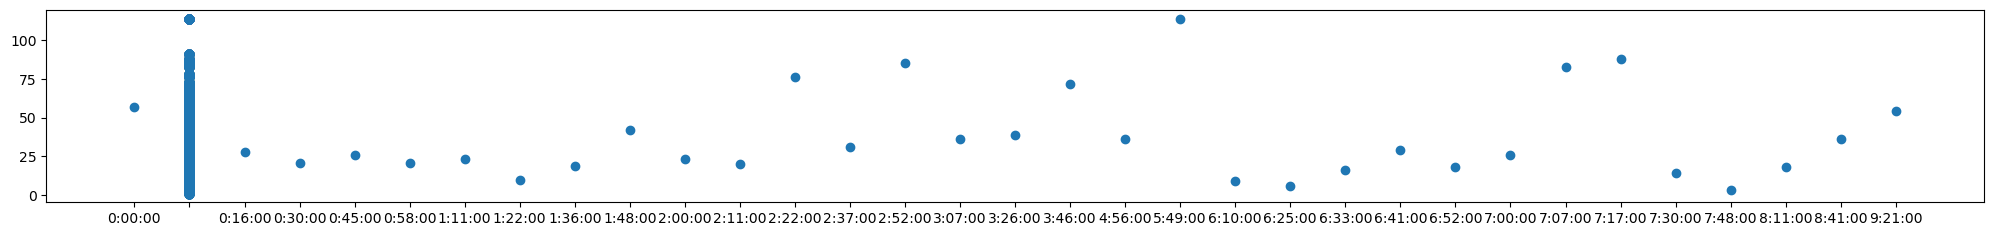

In [ ]:
times = sorted(times)

plt.figure(figsize=(25, 2.5))
for i in range(len(times)):
    if i % 300 != 0:
        times[i] = ""

plt.scatter(times, frequencies)